# 3. graph one day of SOCAT data

----------

This script filters the SOCAT data by year but only uses data above the 30 degrees latitude line, just like in the SOCAT data visualization script. It also has a useful algorithm for graphing a single day of SOCAT data given a date in 'YYYYMMDD' format.

----------

Sydney Paige Kim 

Date Created: 07/16/2021

Last Edited: 08/20/2021

In [1]:
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
np_SOCAT_America = np.genfromtxt("SOCAT_data_North_America_Pacific.csv",delimiter=',')
np_SOCAT_Asia = np.genfromtxt("SOCAT_data_North_Asian_Pacific_fco2_only.csv",delimiter=',')

In [3]:
np_SOCAT_unfiltered = np.concatenate((np_SOCAT_America,np_SOCAT_Asia[1:]),axis=0)

In [4]:
years_to_remove = np.arange(1962.,2000.)
print(years_to_remove)

np_SOCAT = np.copy(np_SOCAT_unfiltered)

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999.]


In [5]:
years_to_remove = np.append(years_to_remove, [2020.], axis=0)
print(years_to_remove)

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2020.]


In [6]:
for yr in years_to_remove:
    rows_to_remove = np.argwhere(np_SOCAT[:,0]==yr)
    np_SOCAT = np.delete(np_SOCAT,rows_to_remove,axis=0)

In [7]:
print(np.shape(np_SOCAT_unfiltered))
print(np.shape(np_SOCAT))

(836968, 7)
(696296, 7)


In [8]:
np.argwhere(np_SOCAT[:,0]==1999.)
# this returns an empty array, so we know it worked

array([], shape=(0, 1), dtype=int64)

In [9]:
def visualize_fco2(date):
    """
    Input
        date - Format YYYYMMDD
        socat_data - array with data
        
    Output
        Plot of fco2 measurements on a given date. 
    """
    
    # cut the YYYYMMDD input into year, month, and day to match the dataset
    year = float(date[0:4])   
    month = float(date[4:6])
    day = float(date[6:8])

    # search for indeces that match the specified date
    inds = np.where((np_SOCAT[:,0]==year) & (np_SOCAT[:,1]==month) & (np_SOCAT[:,2]==day))
    data_for_day = np_SOCAT[inds]

    # this block of code tells you if there is no data for the specified date
    if data_for_day.size == 0:
        print('There is no fco2 data for the date ' + date + '. ' + 'Please try another date.')
    else:
        print('Array data_for_day created.')
        print(data_for_day)
    
    # the rest of this code is what creates the graph
    lat = data_for_day[1:,4]
    lon = data_for_day[1:,5]
    fco2 = data_for_day[1:,6]
    
    plt.rcParams["figure.figsize"] = (20,10)  #(width, height)
    plt.scatter(lon,lat,c=fco2,s=10,cmap='YlGnBu')
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label('fCO2 [microatm]', rotation=270, fontsize=35, labelpad=40)
    
    print('Visualization generated.')

Array data_for_day created.
[[2001.        3.       22.     ...   49.8172  192.645   406.397 ]
 [2001.        3.       22.     ...   49.8124  192.732   410.023 ]
 [2001.        3.       22.     ...   49.8006  192.815   409.782 ]
 ...
 [2001.        3.       22.     ...   31.242   173.92    310.96  ]
 [2001.        3.       22.     ...   31.242   173.92    310.914 ]
 [2001.        3.       22.     ...   31.242   173.92    311.252 ]]
Visualization generated.


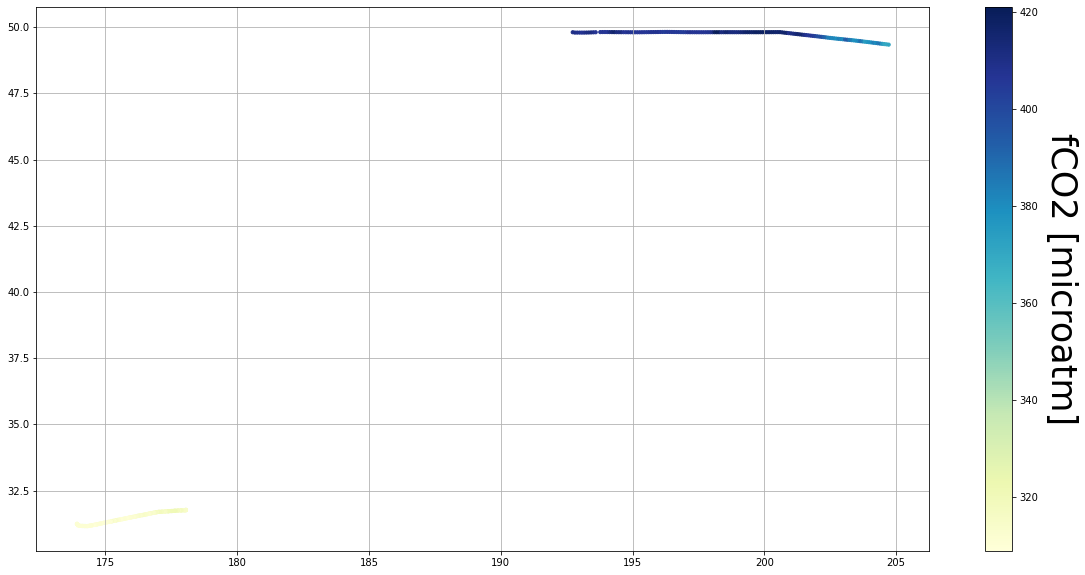

In [10]:
date = '20010322'
visualize_fco2(date)